# Organizing Images From The Food101 Dataset

## Introduction
This notebook organizes the images in the 'Food101' dataset from Kaggle into a standard computer vision data structure for the 3 following deep learning computer vision projects available in my Github account:
1. Food Image Binary Classifier - Computer Vision
2. Food Image Deca (10 Classes) Classifier - Computer Vision
3. Food Image 101 classes Classifier - Computer Vision

The structure is as follows:
- A **train directory** which contains all of the images in the training dataset with subdirectories, each named as a certain class containing images of that specific class.
- A **test directory** with the exact same structure as the train directory.

The code in the notebook will create the following data splits :
1. **Binary dataset** - splits steak/pizza into train and test folders.
2. **Binary dataset with 10% of data** - splits steak/pizza into train and test folders.
3. **10 class dataset** - splits 10 classes into train and test folders.
4. **10 class dataset with 10% of data** - selects random 10% of training data, keep test data the same.
5. **Full class dataset** - splits all the classes into train and test folders.
6. **Full class dataset with 10% of data** - selects random 10% of the training data, and keeps the test data the same.


### Instructions:

1. **Download the Food101 dataset from Kaggle**:
    - Go to the [Food101 Dataset on Kaggle](https://www.kaggle.com/datasets/kmader/food41).
    - Download the dataset and upload the zip file to your Google Drive.

2. **Mount your Google Drive**:
    - Mount your Google Drive to access the uploaded dataset.

4. **Run the notebook**:
    - Follow the steps in the notebook to unzip the data.
    - Run the code in the notebook.
    - At the end of the notebook, you can unmount your Google Drive to clean up.

## Get the data

In [ ]:
# Mount your Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip. Make sure to update the 'zip_file_path' to your correct file path
# zip_file_path = {your_file_path}
# !unzip -q $zip_file_path -d /content/

## Inspect the dataset

In [ ]:
# View the content of the unzipped data
!ls /content

'archive (1)'   data   drive   __MACOSX   sample_data


In [ ]:
!ls '/content/archive (1)'

food_c101_n1000_r384x384x3.h5  food_test_c101_n1000_r128x128x1.h5  food_test_c101_n1000_r64x64x3.h5
food_c101_n10099_r32x32x1.h5   food_test_c101_n1000_r128x128x3.h5  images
food_c101_n10099_r32x32x3.h5   food_test_c101_n1000_r32x32x1.h5    meta
food_c101_n10099_r64x64x1.h5   food_test_c101_n1000_r32x32x3.h5    pizza_steak
food_c101_n10099_r64x64x3.h5   food_test_c101_n1000_r64x64x1.h5


In [ ]:
# View all the 101 class names in the dataset
!ls '/content/archive (1)/images'

apple_pie	    crab_cakes		     gyoza		    poutine
baby_back_ribs	    creme_brulee	     hamburger		    prime_rib
baklava		    croque_madame	     hot_and_sour_soup	    pulled_pork_sandwich
beef_carpaccio	    cup_cakes		     hot_dog		    ramen
beef_tartare	    deviled_eggs	     huevos_rancheros	    ravioli
beet_salad	    donuts		     hummus		    red_velvet_cake
beignets	    dumplings		     ice_cream		    risotto
bibimbap	    edamame		     lasagna		    samosa
bread_pudding	    eggs_benedict	     lobster_bisque	    sashimi
breakfast_burrito   escargots		     lobster_roll_sandwich  scallops
bruschetta	    falafel		     macaroni_and_cheese    seaweed_salad
caesar_salad	    filet_mignon	     macarons		    shrimp_and_grits
cannoli		    fish_and_chips	     miso_soup		    spaghetti_bolognese
caprese_salad	    foie_gras		     mussels		    spaghetti_carbonara
carrot_cake	    french_fries	     nachos		    spring_rolls
ceviche		    french_onion_soup	     omelette		    steak
cheesecake	    french_toas

In [ ]:
# Define paths for images and meta directories
images_dir = '/content/archive (1)/images'
meta_dir = '/content/archive (1)/meta/meta'

## Get the labels in a JSON format

The dataset contains train and test sets in a **json** format in the 'archive/meta/meta' folder. Thus, let's handle this kind of format in the code below:

In [ ]:
import json
from tqdm.notebook import tqdm

def get_labels(label_path):
    """
    A function for getting the labels. It accepts a label path in a JSON format, and returns the file as a Python object.
    """
    with open(label_path) as f:
        return json.load(f)

# Load train and test labels
train_labels = get_labels(os.path.join(meta_dir, 'train.json'))
test_labels = get_labels(os.path.join(meta_dir, 'test.json'))

# Print a sample of the labels to check the paths
print(train_labels['pizza'][:5])
print(test_labels['pizza'][:5])

['pizza/1008104', 'pizza/1008144', 'pizza/1008844', 'pizza/1008941', 'pizza/1011404']
['pizza/1001116', 'pizza/1032754', 'pizza/103708', 'pizza/1060407', 'pizza/106507']


In [ ]:
# Print the Lengths
print(len(train_labels["churros"]))
print(len(test_labels["churros"]))

750
250


## Create the target class folders, and move the images there

In [ ]:
import shutil
import os

def copy_images(parent_folder, new_subset, dataset, target_labels):
    """
    The function copies `labels[target_labels]` images from `parent_folder` to
    `new_subset` (named after `dataset`) folder.
    For example: Move steak images to data/steak_subset/train/ &
    data/steak_subset/test/

    Parameters:
    --------
    parent_folder (str) - original folder path with all data.
    new_subset (str) - name of parent folder to copy to.
    dataset (str) - train/test set.
    labels (list) - list of training or test labels.
    target_labels (list) - list of target labels to copy, for example: ["steak", "pizza"]
    """
    # Getting the appropriate labels
    print(f"\nUsing {dataset} labels...")
    labels = get_labels(os.path.join(meta_dir, dataset + ".json"))

    # Run through target labels
    for i in target_labels:
        # Make target directory
        os.makedirs(parent_folder + "/" + new_subset + "/" + dataset + "/" + i,
                    exist_ok=True)

        # Run through the labels and get the appropriate classes
        images_moved = [] # Keeping track of the images moved
        for j in labels[i]:
            # Create an original image path and new path
            og_path = os.path.join(images_dir, j + ".jpg")
            new_path = parent_folder + "/" + new_subset + "/" + dataset + "/" + j + ".jpg"

            # Copy the images from the old path to the new path
            shutil.copy2(og_path, new_path)
            images_moved.append(new_path)
        print(f"Copied {len(images_moved)} images from {dataset} dataset {i} class...")

## Create a function for getting a random sample of images

In [ ]:
import random

def get_percent_images(target_dir, new_dir, sample_amount=0.1, random_state=42):
    """
    The function gets 'sample_amount' percentage of random images from a 'target_dir', and copies them to 'new_dir'.
    It preserves subdirectory file names.
    For exampple: target_dir=pizza_steak/train/steak/all_files
                -> new_dir_name/train/steak/X_percent_of_all_files

    Parameters:
    --------
    target_dir (str) - file path of the directory to extract images from.
    new_dir (str) - new directory path to copy the original images to.
    sample_amount (float), default 0.1 - percentage of the images to copy (e.g. 0.1 = 10%).
    random_state (int), default 42 - a random seed value.
    """
    # Set random seed for reproducibility results
    random.seed(random_state)

    # Get a list of dictionaries of image files in target_dir, for example: [{"class_name":["2348348.jpg", "2829119.jpg"]}]
    images = [{dir_name: os.listdir(target_dir + dir_name)} for dir_name in os.listdir(target_dir)]

    # Run through the images
    for i in images:
        for k, v in i.items():
            sample_number = round(int(len(v)*sample_amount))
            print(f"There are {len(v)} total images in '{target_dir+k}' so we're going to copy {sample_number} to the new directory.")
            print(f"Getting {sample_number} random images for {k}...")
            random_images = random.sample(v, sample_number)

            # Create a new directory for each key
            new_target_dir = new_dir + k
            print(f"Making dir: {new_target_dir}")
            os.makedirs(new_target_dir, exist_ok=True)

            # Keeping track of the images moved
            images_moved = []
            # Create file paths for the original images and the new file target
            print(f"Copying images from: {target_dir}\n\t\t to: {new_target_dir}/\n")
            for file_name in tqdm(random_images):
                og_path = target_dir + k + "/" + file_name
                new_path = new_target_dir + "/" + file_name
                # Copy the images from OG path to the new path
                shutil.copy2(og_path, new_path)
                images_moved.append(new_path)

            # Make sure the number of images moved is correct
            assert len(os.listdir(new_target_dir)) == sample_number
            assert len(images_moved) == sample_number

## Create binary class data - two classes


In [ ]:
# Creating the needed variables
parent_folder = "data"
target_labels = ["steak", "pizza"]
new_subset = "pizza_steak"
datasets = ["train", "test"]

# Copy the training/test images
for i in datasets:
    copy_images(parent_folder=parent_folder, new_subset=new_subset, dataset=i, target_labels=target_labels)


Using train labels...
Copied 750 images from train dataset steak class...
Copied 750 images from train dataset pizza class...

Using test labels...
Copied 250 images from test dataset steak class...
Copied 250 images from test dataset pizza class...


In [ ]:
# Print the number of images in the training and test sets
print("Number of images in training set:", len(os.listdir("data/pizza_steak/train/steak")))
print("Number of images in test set:", len(os.listdir("data/pizza_steak/test/steak")))

Number of images in training set: 750
Number of images in test set: 250


In [ ]:
# Getting two sets of filenames from the train/test for the steak, and making sure the output equals to 0 (for making sure there are no overlaps in the training and test sets)
train_files = set(os.listdir("data/pizza_steak/train/steak"))
test_files = set(os.listdir("data/pizza_steak/test/steak"))
# Making sure there are no intersection of file names in the training/test set
assert len(train_files.intersection(test_files)) == 0

In [ ]:
# Getting two sets of filenames from the train/test for the pizza, and making sure the output equals to 0 (for making sure there are no overlaps in the training and test sets)
train_files = set(os.listdir("data/pizza_steak/train/pizza"))
test_files = set(os.listdir("data/pizza_steak/test/pizza"))
# Making sure there are no intersection of file names in the training/test set
assert len(train_files.intersection(test_files)) == 0

## Create a binary class dataset of 10% of data


In [ ]:
!ls data/pizza_steak

test  train


In [ ]:
# Create 10% sample binary class dataset of training data only
get_percent_images(target_dir="data/pizza_steak/train/", new_dir="data/pizza_steak_10_percent/train/", sample_amount=0.1, random_state=42)

There are 750 total images in 'data/pizza_steak/train/pizza' so we're going to copy 75 to the new directory.
Getting 75 random images for pizza...
Making dir: data/pizza_steak_10_percent/train/pizza
Copying images from: data/pizza_steak/train/
		 to: data/pizza_steak_10_percent/train/pizza/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/pizza_steak/train/steak' so we're going to copy 75 to the new directory.
Getting 75 random images for steak...
Making dir: data/pizza_steak_10_percent/train/steak
Copying images from: data/pizza_steak/train/
		 to: data/pizza_steak_10_percent/train/steak/



  0%|          | 0/75 [00:00<?, ?it/s]

In [ ]:
# Create 1% sample binary class dataset of training data only
get_percent_images(target_dir="data/pizza_steak/train/", new_dir="data/pizza_steak_1_percent/train/", sample_amount=0.01, random_state=42)

There are 750 total images in 'data/pizza_steak/train/pizza' so we're going to copy 7 to the new directory.
Getting 7 random images for pizza...
Making dir: data/pizza_steak_1_percent/train/pizza
Copying images from: data/pizza_steak/train/
		 to: data/pizza_steak_1_percent/train/pizza/



  0%|          | 0/7 [00:00<?, ?it/s]

There are 750 total images in 'data/pizza_steak/train/steak' so we're going to copy 7 to the new directory.
Getting 7 random images for steak...
Making dir: data/pizza_steak_1_percent/train/steak
Copying images from: data/pizza_steak/train/
		 to: data/pizza_steak_1_percent/train/steak/



  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# Copy the binary classes test folder into binary classes percentages folders
binary_test = "data/pizza_steak/test/"
shutil.copytree(binary_test, "data/pizza_steak_10_percent/test/")
shutil.copytree(binary_test, "data/pizza_steak_1_percent/test/")

'data/pizza_steak_1_percent/test/'

## Visualize some random images




/content/archive (1)/images/chicken_curry/3516788.jpg


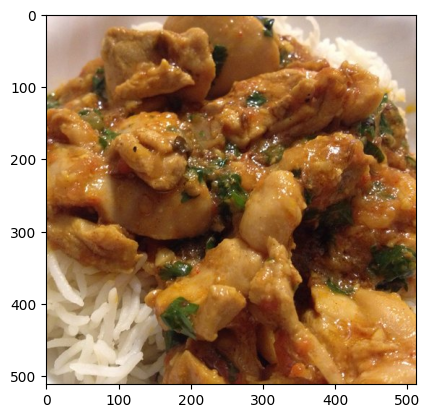

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Viewing a single image
target_dir = "/content/archive (1)/images"
target_class = "chicken_curry"
target_path = os.path.join(target_dir, target_class)
file_names = os.listdir(target_path)
target_img = os.path.join(target_path, random.sample(file_names, 1)[0])
print(target_img)

# Plot
img = mpimg.imread(target_img)
plt.imshow(img);

In [ ]:
def view_three_images(target_dir, target_class):
    """
    The function randomly selects and displays 3 random images from the `target_class` folder in the `target_dir` folder.
    The 'target_dir' needs to be in the following format:
        target_dir
                 |target_class_1
                 |target_class_2
                 |...
    """
    target_path = os.path.join(target_dir, target_class)
    file_names = os.listdir(target_path)
    target_images = random.sample(file_names, 3)

    # Plot images
    plt.figure(figsize=(15, 6))
    for i, img in enumerate(target_images):
        img_path = os.path.join(target_path, img)
        plt.subplot(1, 3, i+1)
        plt.imshow(mpimg.imread(img_path))
        plt.title(target_class)
        plt.axis("off")

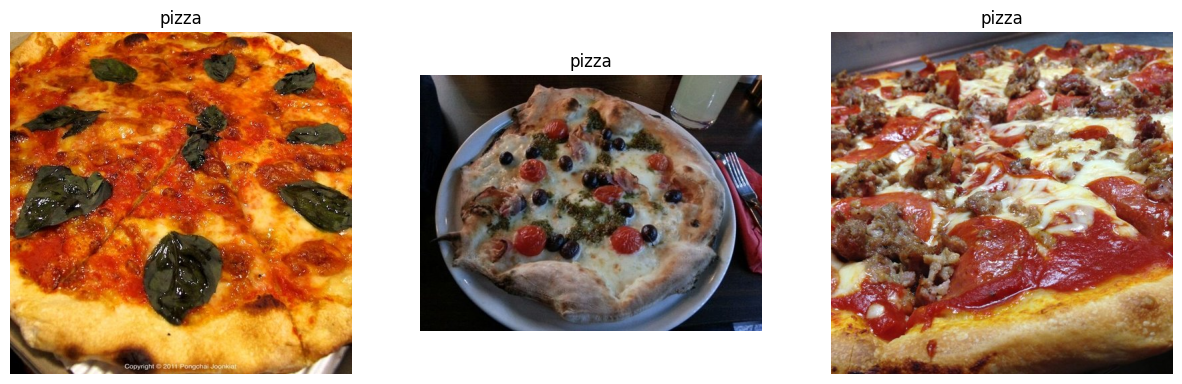

In [ ]:
view_three_images(target_dir="/content/archive (1)/images", target_class="pizza")

## Create a 10 class dataset


In [ ]:
!ls '/content/archive (1)/meta/meta'

classes.txt  labels.txt  test.json  test.txt  train.json  train.txt


In [ ]:
# Get all the class names
classes = [] # Create an empty list for storing the class names
with open("/content/archive (1)/meta/meta/classes.txt") as f:
    for line in f.readlines():
        classes.append(line.split("\n")[0])

# Display the class names
classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
# Check the leangth of 10 classes
ten_classes = ["pizza", "steak", "sushi", "ramen", "chicken_wings",
               "chicken_curry", "hamburger", "fried_rice", "grilled_salmon",
               "ice_cream"]
len(ten_classes)

10

In [ ]:
parent_folder = "data"
new_subset = "10_food_classes"
datasets = ["train", "test"]

# Coping the training/test images
for i in datasets:
    copy_images(parent_folder=parent_folder, new_subset=new_subset, dataset=i, target_labels=ten_classes)


Using train labels...
Copied 750 images from train dataset pizza class...
Copied 750 images from train dataset steak class...
Copied 750 images from train dataset sushi class...
Copied 750 images from train dataset ramen class...
Copied 750 images from train dataset chicken_wings class...
Copied 750 images from train dataset chicken_curry class...
Copied 750 images from train dataset hamburger class...
Copied 750 images from train dataset fried_rice class...
Copied 750 images from train dataset grilled_salmon class...
Copied 750 images from train dataset ice_cream class...

Using test labels...
Copied 250 images from test dataset pizza class...
Copied 250 images from test dataset steak class...
Copied 250 images from test dataset sushi class...
Copied 250 images from test dataset ramen class...
Copied 250 images from test dataset chicken_wings class...
Copied 250 images from test dataset chicken_curry class...
Copied 250 images from test dataset hamburger class...
Copied 250 images fr

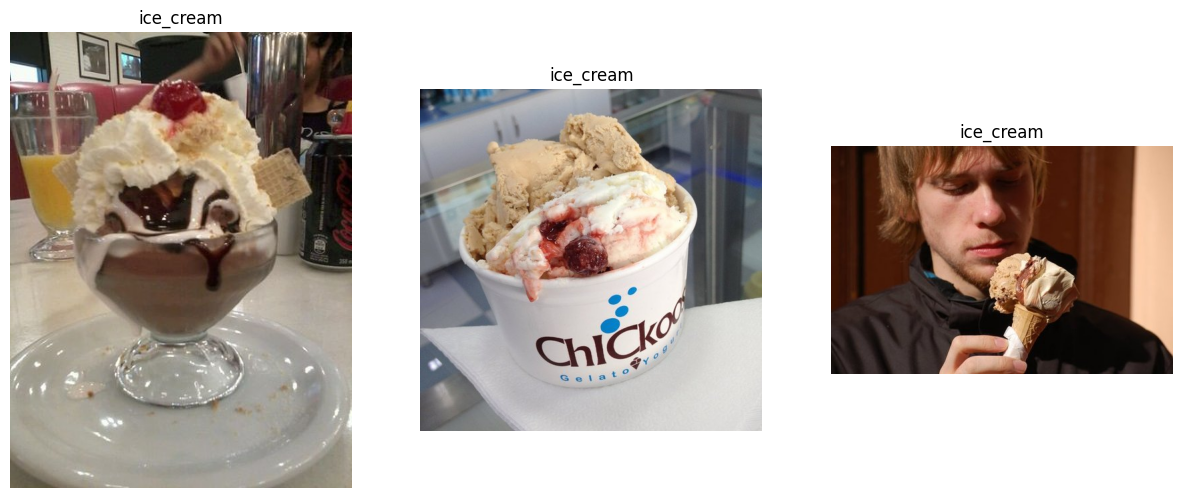

In [ ]:
# Let's view some images
view_three_images(target_dir="/content/archive (1)/images/", target_class="ice_cream")

In [ ]:
# Create a 10% dataset of the '10_food_classes' of training data only
get_percent_images(target_dir="data/10_food_classes/train/", new_dir="data/10_food_classes_10_percent/train/", sample_amount=0.1, random_state=42)

There are 750 total images in 'data/10_food_classes/train/pizza' so we're going to copy 75 to the new directory.
Getting 75 random images for pizza...
Making dir: data/10_food_classes_10_percent/train/pizza
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_10_percent/train/pizza/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/chicken_wings' so we're going to copy 75 to the new directory.
Getting 75 random images for chicken_wings...
Making dir: data/10_food_classes_10_percent/train/chicken_wings
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_10_percent/train/chicken_wings/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/ice_cream' so we're going to copy 75 to the new directory.
Getting 75 random images for ice_cream...
Making dir: data/10_food_classes_10_percent/train/ice_cream
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_10_percent/train/ice_cream/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/sushi' so we're going to copy 75 to the new directory.
Getting 75 random images for sushi...
Making dir: data/10_food_classes_10_percent/train/sushi
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_10_percent/train/sushi/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/grilled_salmon' so we're going to copy 75 to the new directory.
Getting 75 random images for grilled_salmon...
Making dir: data/10_food_classes_10_percent/train/grilled_salmon
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_10_percent/train/grilled_salmon/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/hamburger' so we're going to copy 75 to the new directory.
Getting 75 random images for hamburger...
Making dir: data/10_food_classes_10_percent/train/hamburger
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_10_percent/train/hamburger/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/steak' so we're going to copy 75 to the new directory.
Getting 75 random images for steak...
Making dir: data/10_food_classes_10_percent/train/steak
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_10_percent/train/steak/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/fried_rice' so we're going to copy 75 to the new directory.
Getting 75 random images for fried_rice...
Making dir: data/10_food_classes_10_percent/train/fried_rice
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_10_percent/train/fried_rice/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/ramen' so we're going to copy 75 to the new directory.
Getting 75 random images for ramen...
Making dir: data/10_food_classes_10_percent/train/ramen
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_10_percent/train/ramen/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/chicken_curry' so we're going to copy 75 to the new directory.
Getting 75 random images for chicken_curry...
Making dir: data/10_food_classes_10_percent/train/chicken_curry
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_10_percent/train/chicken_curry/



  0%|          | 0/75 [00:00<?, ?it/s]

In [ ]:
# Create a 1% dataset of '10_food_classes' of training data only
get_percent_images(target_dir="data/10_food_classes/train/", new_dir="data/10_food_classes_1_percent/train/", sample_amount=0.01, random_state=42)

There are 750 total images in 'data/10_food_classes/train/pizza' so we're going to copy 7 to the new directory.
Getting 7 random images for pizza...
Making dir: data/10_food_classes_1_percent/train/pizza
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_1_percent/train/pizza/



  0%|          | 0/7 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/chicken_wings' so we're going to copy 7 to the new directory.
Getting 7 random images for chicken_wings...
Making dir: data/10_food_classes_1_percent/train/chicken_wings
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_1_percent/train/chicken_wings/



  0%|          | 0/7 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/ice_cream' so we're going to copy 7 to the new directory.
Getting 7 random images for ice_cream...
Making dir: data/10_food_classes_1_percent/train/ice_cream
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_1_percent/train/ice_cream/



  0%|          | 0/7 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/sushi' so we're going to copy 7 to the new directory.
Getting 7 random images for sushi...
Making dir: data/10_food_classes_1_percent/train/sushi
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_1_percent/train/sushi/



  0%|          | 0/7 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/grilled_salmon' so we're going to copy 7 to the new directory.
Getting 7 random images for grilled_salmon...
Making dir: data/10_food_classes_1_percent/train/grilled_salmon
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_1_percent/train/grilled_salmon/



  0%|          | 0/7 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/hamburger' so we're going to copy 7 to the new directory.
Getting 7 random images for hamburger...
Making dir: data/10_food_classes_1_percent/train/hamburger
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_1_percent/train/hamburger/



  0%|          | 0/7 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/steak' so we're going to copy 7 to the new directory.
Getting 7 random images for steak...
Making dir: data/10_food_classes_1_percent/train/steak
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_1_percent/train/steak/



  0%|          | 0/7 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/fried_rice' so we're going to copy 7 to the new directory.
Getting 7 random images for fried_rice...
Making dir: data/10_food_classes_1_percent/train/fried_rice
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_1_percent/train/fried_rice/



  0%|          | 0/7 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/ramen' so we're going to copy 7 to the new directory.
Getting 7 random images for ramen...
Making dir: data/10_food_classes_1_percent/train/ramen
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_1_percent/train/ramen/



  0%|          | 0/7 [00:00<?, ?it/s]

There are 750 total images in 'data/10_food_classes/train/chicken_curry' so we're going to copy 7 to the new directory.
Getting 7 random images for chicken_curry...
Making dir: data/10_food_classes_1_percent/train/chicken_curry
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_1_percent/train/chicken_curry/



  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# Copy the 10 classes test folder into the 10 classes percentages folders
ten_percent_test = "data/10_food_classes/test/"
shutil.copytree(ten_percent_test, "data/10_food_classes_10_percent/test/")
shutil.copytree(ten_percent_test, "data/10_food_classes_1_percent/test/")

'data/10_food_classes_1_percent/test/'

## Split the entire dataset into train and test sets


In [ ]:
# Display the class names
classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
parent_folder = "data"
new_subset = "all_food_classes"
datasets = ["train", "test"]

# Coping the training/test images
for i in datasets:
    copy_images(parent_folder=parent_folder, new_subset=new_subset, dataset=i, target_labels=classes)


Using train labels...
Copied 750 images from train dataset apple_pie class...
Copied 750 images from train dataset baby_back_ribs class...
Copied 750 images from train dataset baklava class...
Copied 750 images from train dataset beef_carpaccio class...
Copied 750 images from train dataset beef_tartare class...
Copied 750 images from train dataset beet_salad class...
Copied 750 images from train dataset beignets class...
Copied 750 images from train dataset bibimbap class...
Copied 750 images from train dataset bread_pudding class...
Copied 750 images from train dataset breakfast_burrito class...
Copied 750 images from train dataset bruschetta class...
Copied 750 images from train dataset caesar_salad class...
Copied 750 images from train dataset cannoli class...
Copied 750 images from train dataset caprese_salad class...
Copied 750 images from train dataset carrot_cake class...
Copied 750 images from train dataset ceviche class...
Copied 750 images from train dataset cheesecake class

In [ ]:
# Create a 10% of all the class images
get_percent_images(target_dir="data/all_food_classes/train/", new_dir="data/all_food_classes_10_percent/train/", sample_amount=0.1, random_state=42)

There are 750 total images in 'data/all_food_classes/train/breakfast_burrito' so we're going to copy 75 to the new directory.
Getting 75 random images for breakfast_burrito...
Making dir: data/all_food_classes_10_percent/train/breakfast_burrito
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/breakfast_burrito/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/greek_salad' so we're going to copy 75 to the new directory.
Getting 75 random images for greek_salad...
Making dir: data/all_food_classes_10_percent/train/greek_salad
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/greek_salad/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/pad_thai' so we're going to copy 75 to the new directory.
Getting 75 random images for pad_thai...
Making dir: data/all_food_classes_10_percent/train/pad_thai
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/pad_thai/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/samosa' so we're going to copy 75 to the new directory.
Getting 75 random images for samosa...
Making dir: data/all_food_classes_10_percent/train/samosa
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/samosa/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/pizza' so we're going to copy 75 to the new directory.
Getting 75 random images for pizza...
Making dir: data/all_food_classes_10_percent/train/pizza
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/pizza/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/chicken_wings' so we're going to copy 75 to the new directory.
Getting 75 random images for chicken_wings...
Making dir: data/all_food_classes_10_percent/train/chicken_wings
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/chicken_wings/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/panna_cotta' so we're going to copy 75 to the new directory.
Getting 75 random images for panna_cotta...
Making dir: data/all_food_classes_10_percent/train/panna_cotta
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/panna_cotta/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/waffles' so we're going to copy 75 to the new directory.
Getting 75 random images for waffles...
Making dir: data/all_food_classes_10_percent/train/waffles
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/waffles/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/red_velvet_cake' so we're going to copy 75 to the new directory.
Getting 75 random images for red_velvet_cake...
Making dir: data/all_food_classes_10_percent/train/red_velvet_cake
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/red_velvet_cake/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/risotto' so we're going to copy 75 to the new directory.
Getting 75 random images for risotto...
Making dir: data/all_food_classes_10_percent/train/risotto
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/risotto/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/cheese_plate' so we're going to copy 75 to the new directory.
Getting 75 random images for cheese_plate...
Making dir: data/all_food_classes_10_percent/train/cheese_plate
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/cheese_plate/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/apple_pie' so we're going to copy 75 to the new directory.
Getting 75 random images for apple_pie...
Making dir: data/all_food_classes_10_percent/train/apple_pie
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/apple_pie/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/fried_calamari' so we're going to copy 75 to the new directory.
Getting 75 random images for fried_calamari...
Making dir: data/all_food_classes_10_percent/train/fried_calamari
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/fried_calamari/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/pulled_pork_sandwich' so we're going to copy 75 to the new directory.
Getting 75 random images for pulled_pork_sandwich...
Making dir: data/all_food_classes_10_percent/train/pulled_pork_sandwich
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/pulled_pork_sandwich/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/french_fries' so we're going to copy 75 to the new directory.
Getting 75 random images for french_fries...
Making dir: data/all_food_classes_10_percent/train/french_fries
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/french_fries/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/filet_mignon' so we're going to copy 75 to the new directory.
Getting 75 random images for filet_mignon...
Making dir: data/all_food_classes_10_percent/train/filet_mignon
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/filet_mignon/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/deviled_eggs' so we're going to copy 75 to the new directory.
Getting 75 random images for deviled_eggs...
Making dir: data/all_food_classes_10_percent/train/deviled_eggs
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/deviled_eggs/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/gnocchi' so we're going to copy 75 to the new directory.
Getting 75 random images for gnocchi...
Making dir: data/all_food_classes_10_percent/train/gnocchi
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/gnocchi/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/bibimbap' so we're going to copy 75 to the new directory.
Getting 75 random images for bibimbap...
Making dir: data/all_food_classes_10_percent/train/bibimbap
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/bibimbap/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/pork_chop' so we're going to copy 75 to the new directory.
Getting 75 random images for pork_chop...
Making dir: data/all_food_classes_10_percent/train/pork_chop
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/pork_chop/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/hummus' so we're going to copy 75 to the new directory.
Getting 75 random images for hummus...
Making dir: data/all_food_classes_10_percent/train/hummus
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/hummus/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/grilled_cheese_sandwich' so we're going to copy 75 to the new directory.
Getting 75 random images for grilled_cheese_sandwich...
Making dir: data/all_food_classes_10_percent/train/grilled_cheese_sandwich
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/grilled_cheese_sandwich/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/french_toast' so we're going to copy 75 to the new directory.
Getting 75 random images for french_toast...
Making dir: data/all_food_classes_10_percent/train/french_toast
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/french_toast/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/falafel' so we're going to copy 75 to the new directory.
Getting 75 random images for falafel...
Making dir: data/all_food_classes_10_percent/train/falafel
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/falafel/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/escargots' so we're going to copy 75 to the new directory.
Getting 75 random images for escargots...
Making dir: data/all_food_classes_10_percent/train/escargots
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/escargots/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/spaghetti_carbonara' so we're going to copy 75 to the new directory.
Getting 75 random images for spaghetti_carbonara...
Making dir: data/all_food_classes_10_percent/train/spaghetti_carbonara
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/spaghetti_carbonara/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/ice_cream' so we're going to copy 75 to the new directory.
Getting 75 random images for ice_cream...
Making dir: data/all_food_classes_10_percent/train/ice_cream
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/ice_cream/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/club_sandwich' so we're going to copy 75 to the new directory.
Getting 75 random images for club_sandwich...
Making dir: data/all_food_classes_10_percent/train/club_sandwich
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/club_sandwich/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/sushi' so we're going to copy 75 to the new directory.
Getting 75 random images for sushi...
Making dir: data/all_food_classes_10_percent/train/sushi
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/sushi/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/paella' so we're going to copy 75 to the new directory.
Getting 75 random images for paella...
Making dir: data/all_food_classes_10_percent/train/paella
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/paella/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/frozen_yogurt' so we're going to copy 75 to the new directory.
Getting 75 random images for frozen_yogurt...
Making dir: data/all_food_classes_10_percent/train/frozen_yogurt
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/frozen_yogurt/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/lasagna' so we're going to copy 75 to the new directory.
Getting 75 random images for lasagna...
Making dir: data/all_food_classes_10_percent/train/lasagna
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/lasagna/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/beignets' so we're going to copy 75 to the new directory.
Getting 75 random images for beignets...
Making dir: data/all_food_classes_10_percent/train/beignets
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/beignets/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/spring_rolls' so we're going to copy 75 to the new directory.
Getting 75 random images for spring_rolls...
Making dir: data/all_food_classes_10_percent/train/spring_rolls
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/spring_rolls/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/cup_cakes' so we're going to copy 75 to the new directory.
Getting 75 random images for cup_cakes...
Making dir: data/all_food_classes_10_percent/train/cup_cakes
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/cup_cakes/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/foie_gras' so we're going to copy 75 to the new directory.
Getting 75 random images for foie_gras...
Making dir: data/all_food_classes_10_percent/train/foie_gras
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/foie_gras/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/macarons' so we're going to copy 75 to the new directory.
Getting 75 random images for macarons...
Making dir: data/all_food_classes_10_percent/train/macarons
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/macarons/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/sashimi' so we're going to copy 75 to the new directory.
Getting 75 random images for sashimi...
Making dir: data/all_food_classes_10_percent/train/sashimi
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/sashimi/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/eggs_benedict' so we're going to copy 75 to the new directory.
Getting 75 random images for eggs_benedict...
Making dir: data/all_food_classes_10_percent/train/eggs_benedict
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/eggs_benedict/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/lobster_bisque' so we're going to copy 75 to the new directory.
Getting 75 random images for lobster_bisque...
Making dir: data/all_food_classes_10_percent/train/lobster_bisque
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/lobster_bisque/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/chocolate_cake' so we're going to copy 75 to the new directory.
Getting 75 random images for chocolate_cake...
Making dir: data/all_food_classes_10_percent/train/chocolate_cake
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/chocolate_cake/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/strawberry_shortcake' so we're going to copy 75 to the new directory.
Getting 75 random images for strawberry_shortcake...
Making dir: data/all_food_classes_10_percent/train/strawberry_shortcake
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/strawberry_shortcake/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/clam_chowder' so we're going to copy 75 to the new directory.
Getting 75 random images for clam_chowder...
Making dir: data/all_food_classes_10_percent/train/clam_chowder
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/clam_chowder/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/macaroni_and_cheese' so we're going to copy 75 to the new directory.
Getting 75 random images for macaroni_and_cheese...
Making dir: data/all_food_classes_10_percent/train/macaroni_and_cheese
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/macaroni_and_cheese/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/ceviche' so we're going to copy 75 to the new directory.
Getting 75 random images for ceviche...
Making dir: data/all_food_classes_10_percent/train/ceviche
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/ceviche/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/scallops' so we're going to copy 75 to the new directory.
Getting 75 random images for scallops...
Making dir: data/all_food_classes_10_percent/train/scallops
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/scallops/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/bruschetta' so we're going to copy 75 to the new directory.
Getting 75 random images for bruschetta...
Making dir: data/all_food_classes_10_percent/train/bruschetta
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/bruschetta/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/tiramisu' so we're going to copy 75 to the new directory.
Getting 75 random images for tiramisu...
Making dir: data/all_food_classes_10_percent/train/tiramisu
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/tiramisu/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/omelette' so we're going to copy 75 to the new directory.
Getting 75 random images for omelette...
Making dir: data/all_food_classes_10_percent/train/omelette
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/omelette/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/prime_rib' so we're going to copy 75 to the new directory.
Getting 75 random images for prime_rib...
Making dir: data/all_food_classes_10_percent/train/prime_rib
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/prime_rib/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/lobster_roll_sandwich' so we're going to copy 75 to the new directory.
Getting 75 random images for lobster_roll_sandwich...
Making dir: data/all_food_classes_10_percent/train/lobster_roll_sandwich
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/lobster_roll_sandwich/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/caesar_salad' so we're going to copy 75 to the new directory.
Getting 75 random images for caesar_salad...
Making dir: data/all_food_classes_10_percent/train/caesar_salad
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/caesar_salad/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/hot_and_sour_soup' so we're going to copy 75 to the new directory.
Getting 75 random images for hot_and_sour_soup...
Making dir: data/all_food_classes_10_percent/train/hot_and_sour_soup
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/hot_and_sour_soup/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/nachos' so we're going to copy 75 to the new directory.
Getting 75 random images for nachos...
Making dir: data/all_food_classes_10_percent/train/nachos
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/nachos/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/spaghetti_bolognese' so we're going to copy 75 to the new directory.
Getting 75 random images for spaghetti_bolognese...
Making dir: data/all_food_classes_10_percent/train/spaghetti_bolognese
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/spaghetti_bolognese/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/croque_madame' so we're going to copy 75 to the new directory.
Getting 75 random images for croque_madame...
Making dir: data/all_food_classes_10_percent/train/croque_madame
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/croque_madame/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/grilled_salmon' so we're going to copy 75 to the new directory.
Getting 75 random images for grilled_salmon...
Making dir: data/all_food_classes_10_percent/train/grilled_salmon
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/grilled_salmon/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/ravioli' so we're going to copy 75 to the new directory.
Getting 75 random images for ravioli...
Making dir: data/all_food_classes_10_percent/train/ravioli
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/ravioli/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/hamburger' so we're going to copy 75 to the new directory.
Getting 75 random images for hamburger...
Making dir: data/all_food_classes_10_percent/train/hamburger
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/hamburger/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/beef_carpaccio' so we're going to copy 75 to the new directory.
Getting 75 random images for beef_carpaccio...
Making dir: data/all_food_classes_10_percent/train/beef_carpaccio
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/beef_carpaccio/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/gyoza' so we're going to copy 75 to the new directory.
Getting 75 random images for gyoza...
Making dir: data/all_food_classes_10_percent/train/gyoza
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/gyoza/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/chicken_quesadilla' so we're going to copy 75 to the new directory.
Getting 75 random images for chicken_quesadilla...
Making dir: data/all_food_classes_10_percent/train/chicken_quesadilla
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/chicken_quesadilla/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/cheesecake' so we're going to copy 75 to the new directory.
Getting 75 random images for cheesecake...
Making dir: data/all_food_classes_10_percent/train/cheesecake
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/cheesecake/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/onion_rings' so we're going to copy 75 to the new directory.
Getting 75 random images for onion_rings...
Making dir: data/all_food_classes_10_percent/train/onion_rings
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/onion_rings/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/seaweed_salad' so we're going to copy 75 to the new directory.
Getting 75 random images for seaweed_salad...
Making dir: data/all_food_classes_10_percent/train/seaweed_salad
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/seaweed_salad/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/takoyaki' so we're going to copy 75 to the new directory.
Getting 75 random images for takoyaki...
Making dir: data/all_food_classes_10_percent/train/takoyaki
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/takoyaki/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/shrimp_and_grits' so we're going to copy 75 to the new directory.
Getting 75 random images for shrimp_and_grits...
Making dir: data/all_food_classes_10_percent/train/shrimp_and_grits
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/shrimp_and_grits/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/baklava' so we're going to copy 75 to the new directory.
Getting 75 random images for baklava...
Making dir: data/all_food_classes_10_percent/train/baklava
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/baklava/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/fish_and_chips' so we're going to copy 75 to the new directory.
Getting 75 random images for fish_and_chips...
Making dir: data/all_food_classes_10_percent/train/fish_and_chips
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/fish_and_chips/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/garlic_bread' so we're going to copy 75 to the new directory.
Getting 75 random images for garlic_bread...
Making dir: data/all_food_classes_10_percent/train/garlic_bread
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/garlic_bread/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/churros' so we're going to copy 75 to the new directory.
Getting 75 random images for churros...
Making dir: data/all_food_classes_10_percent/train/churros
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/churros/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/poutine' so we're going to copy 75 to the new directory.
Getting 75 random images for poutine...
Making dir: data/all_food_classes_10_percent/train/poutine
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/poutine/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/crab_cakes' so we're going to copy 75 to the new directory.
Getting 75 random images for crab_cakes...
Making dir: data/all_food_classes_10_percent/train/crab_cakes
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/crab_cakes/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/creme_brulee' so we're going to copy 75 to the new directory.
Getting 75 random images for creme_brulee...
Making dir: data/all_food_classes_10_percent/train/creme_brulee
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/creme_brulee/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/dumplings' so we're going to copy 75 to the new directory.
Getting 75 random images for dumplings...
Making dir: data/all_food_classes_10_percent/train/dumplings
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/dumplings/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/steak' so we're going to copy 75 to the new directory.
Getting 75 random images for steak...
Making dir: data/all_food_classes_10_percent/train/steak
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/steak/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/mussels' so we're going to copy 75 to the new directory.
Getting 75 random images for mussels...
Making dir: data/all_food_classes_10_percent/train/mussels
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/mussels/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/edamame' so we're going to copy 75 to the new directory.
Getting 75 random images for edamame...
Making dir: data/all_food_classes_10_percent/train/edamame
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/edamame/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/chocolate_mousse' so we're going to copy 75 to the new directory.
Getting 75 random images for chocolate_mousse...
Making dir: data/all_food_classes_10_percent/train/chocolate_mousse
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/chocolate_mousse/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/tuna_tartare' so we're going to copy 75 to the new directory.
Getting 75 random images for tuna_tartare...
Making dir: data/all_food_classes_10_percent/train/tuna_tartare
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/tuna_tartare/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/guacamole' so we're going to copy 75 to the new directory.
Getting 75 random images for guacamole...
Making dir: data/all_food_classes_10_percent/train/guacamole
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/guacamole/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/hot_dog' so we're going to copy 75 to the new directory.
Getting 75 random images for hot_dog...
Making dir: data/all_food_classes_10_percent/train/hot_dog
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/hot_dog/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/beef_tartare' so we're going to copy 75 to the new directory.
Getting 75 random images for beef_tartare...
Making dir: data/all_food_classes_10_percent/train/beef_tartare
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/beef_tartare/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/pancakes' so we're going to copy 75 to the new directory.
Getting 75 random images for pancakes...
Making dir: data/all_food_classes_10_percent/train/pancakes
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/pancakes/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/fried_rice' so we're going to copy 75 to the new directory.
Getting 75 random images for fried_rice...
Making dir: data/all_food_classes_10_percent/train/fried_rice
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/fried_rice/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/beet_salad' so we're going to copy 75 to the new directory.
Getting 75 random images for beet_salad...
Making dir: data/all_food_classes_10_percent/train/beet_salad
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/beet_salad/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/carrot_cake' so we're going to copy 75 to the new directory.
Getting 75 random images for carrot_cake...
Making dir: data/all_food_classes_10_percent/train/carrot_cake
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/carrot_cake/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/peking_duck' so we're going to copy 75 to the new directory.
Getting 75 random images for peking_duck...
Making dir: data/all_food_classes_10_percent/train/peking_duck
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/peking_duck/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/oysters' so we're going to copy 75 to the new directory.
Getting 75 random images for oysters...
Making dir: data/all_food_classes_10_percent/train/oysters
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/oysters/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/miso_soup' so we're going to copy 75 to the new directory.
Getting 75 random images for miso_soup...
Making dir: data/all_food_classes_10_percent/train/miso_soup
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/miso_soup/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/donuts' so we're going to copy 75 to the new directory.
Getting 75 random images for donuts...
Making dir: data/all_food_classes_10_percent/train/donuts
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/donuts/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/ramen' so we're going to copy 75 to the new directory.
Getting 75 random images for ramen...
Making dir: data/all_food_classes_10_percent/train/ramen
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/ramen/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/tacos' so we're going to copy 75 to the new directory.
Getting 75 random images for tacos...
Making dir: data/all_food_classes_10_percent/train/tacos
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/tacos/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/chicken_curry' so we're going to copy 75 to the new directory.
Getting 75 random images for chicken_curry...
Making dir: data/all_food_classes_10_percent/train/chicken_curry
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/chicken_curry/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/baby_back_ribs' so we're going to copy 75 to the new directory.
Getting 75 random images for baby_back_ribs...
Making dir: data/all_food_classes_10_percent/train/baby_back_ribs
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/baby_back_ribs/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/caprese_salad' so we're going to copy 75 to the new directory.
Getting 75 random images for caprese_salad...
Making dir: data/all_food_classes_10_percent/train/caprese_salad
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/caprese_salad/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/french_onion_soup' so we're going to copy 75 to the new directory.
Getting 75 random images for french_onion_soup...
Making dir: data/all_food_classes_10_percent/train/french_onion_soup
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/french_onion_soup/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/bread_pudding' so we're going to copy 75 to the new directory.
Getting 75 random images for bread_pudding...
Making dir: data/all_food_classes_10_percent/train/bread_pudding
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/bread_pudding/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/huevos_rancheros' so we're going to copy 75 to the new directory.
Getting 75 random images for huevos_rancheros...
Making dir: data/all_food_classes_10_percent/train/huevos_rancheros
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/huevos_rancheros/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/cannoli' so we're going to copy 75 to the new directory.
Getting 75 random images for cannoli...
Making dir: data/all_food_classes_10_percent/train/cannoli
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/cannoli/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'data/all_food_classes/train/pho' so we're going to copy 75 to the new directory.
Getting 75 random images for pho...
Making dir: data/all_food_classes_10_percent/train/pho
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/pho/



  0%|          | 0/75 [00:00<?, ?it/s]

In [ ]:
# Copy all the classes test folder into all the classes percentage folders
ten_percent_test = "data/all_food_classes/test/"
shutil.copytree(ten_percent_test, "data/all_food_classes_10_percent/test/")

'data/all_food_classes_10_percent/test/'

In [ ]:
# Unmount your Google Drive
# from google.colab import drive
# drive.flush_and_unmount()